### Fit S21 traces for R6_F1_5p35

In [1]:
from pathlib import Path
from rrfit.hangerfit import fit_s21_v2
from betata.resonator_studies.trace import Trace, load_traces, save_traces

CWD = Path.cwd()

Specify input folder and output file

In [2]:
resonator_name = "R6_F1_5p35"
input_folder = CWD / f"data/resonator_studies/{resonator_name}"
output_file = CWD / f"out/resonator_studies/{resonator_name}.h5"

Load traces

In [3]:
traces: list[Trace] = load_traces(input_folder)

Fit traces

[[Model]]
    Model(S21Model)
[[Fit Statistics]]
    # fitting method   = least_squares
    # function evals   = 20
    # data points      = 480
    # variables        = 4
    chi-square         = 5.2194e-04
    reduced chi-square = 1.0965e-06
    Akaike info crit   = -6583.23333
    Bayesian info crit = -6566.53819
    R-squared          = np.complex128(-93953426031.33589+1425859898.6655722j)
[[Variables]]
    fr:     5.3483e+09 +/- 8.64847233 (0.00%) (init = 5.348312e+09)
    Ql:     132551.102 +/- 56.8238999 (0.04%) (init = 135480.5)
    absQc:  262294.496 +/- 97.2672310 (0.04%) (init = 268085.8)
    phi:   -0.37502654 +/- 3.7082e-04 (0.10%) (init = -0.375028)
    a:      1 (fixed)
    alpha:  0 (fixed)
    tau:    0 (fixed)
    Qi:     250204.603 +/- 141.602064 (0.06%) == '1 / ((1 / Ql) - (cos(phi) / absQc))'
[[Correlations]] (unreported correlations are < 0.100)
    C(Ql, absQc) = +0.8650
    C(fr, phi)   = -0.8650


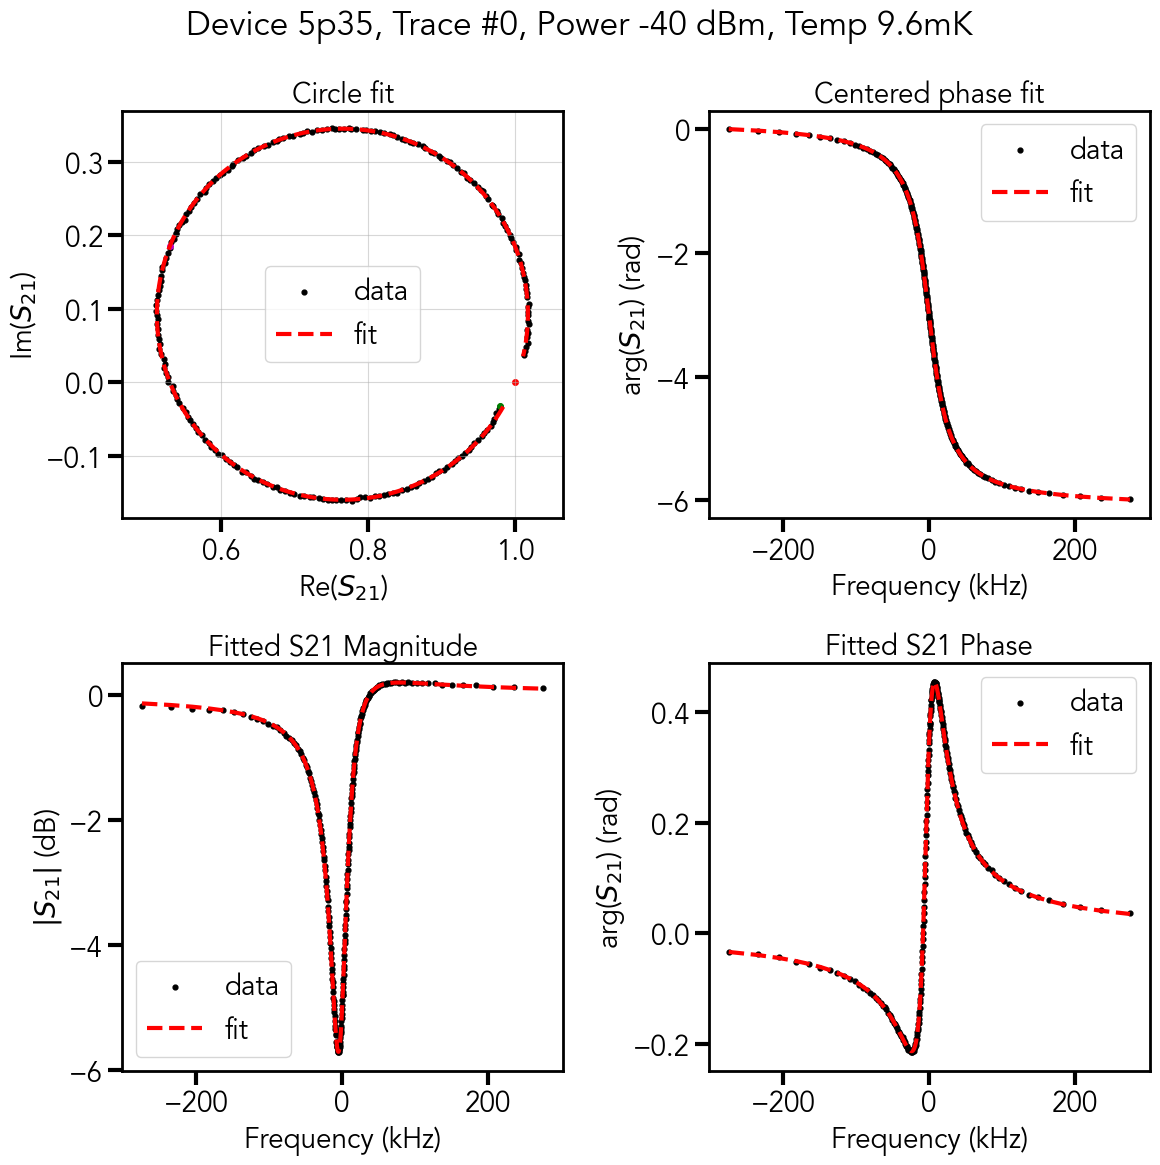

In [4]:
for trace in traces:
    plot_title = f"Device {trace.resonator_name}, Trace #{trace.id}, Power {trace.power} dBm, Temp {trace.temperature * 1e3:.1f}mK"
    fit_s21_v2(trace, plot_title=plot_title)

Exclude traces

In [5]:
traces_to_exclude = []
for trace in traces:
    if trace.id in traces_to_exclude:
        trace.is_excluded = True
    else:
        trace.is_excluded = False

Save fitted traces

In [6]:
save_traces(traces, output_file)